In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [69]:
df = pd.read_csv('/content/81-90.csv')

In [70]:
df['ratio'] = np.where(df['cit_2021'] == 0, 0, df['cit_2022'] / df['cit_2021'])
df['ratio'] = round(df['ratio'], 2)
# Assign categories based on the ratio
conditions = [
    df['ratio'] <= 1.05,
    (df['ratio'] >= 1.06) & (df['ratio'] <= 1.15),
    df['ratio'] > 1.15
]
choices = ['Low', 'Medium', 'High']
df['category'] = np.select(conditions, choices, default='Other')

In [71]:
print(df)

    univ_rank first_initial last_initial  cit_2017  cit_2018  cit_2019  \
0          81             S            G       363       333       350   
1          81             A            S       329       244       266   
2          81             B            A         4        20        48   
3          81             J            H       298       279       303   
4          81             P            J       608       660       648   
..        ...           ...          ...       ...       ...       ...   
95         90             A            A      1126      1474      1316   
96         90             J            B       113       186       167   
97         90             W            D         0         7         6   
98         90             A            K       142       242       254   
99         90             D            L         0         0        10   

    cit_2020  cit_2021  cit_2022  h_index  i_10_index  ratio category  
0        345       302       298       

In [72]:
X = df[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021', 'cit_2022']]

scaler = MinMaxScaler();
X = scaler.fit_transform(X)
category_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['category_encoded'] = df['category'].map(category_mapping)

y = df['category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
base_classifier = DecisionTreeClassifier(max_depth=1)

# Define the AdaBoost model
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=0.01, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.00      0.00      0.00         1
           2       0.60      0.86      0.71         7

    accuracy                           0.75        20
   macro avg       0.50      0.54      0.51        20
weighted avg       0.75      0.75      0.74        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


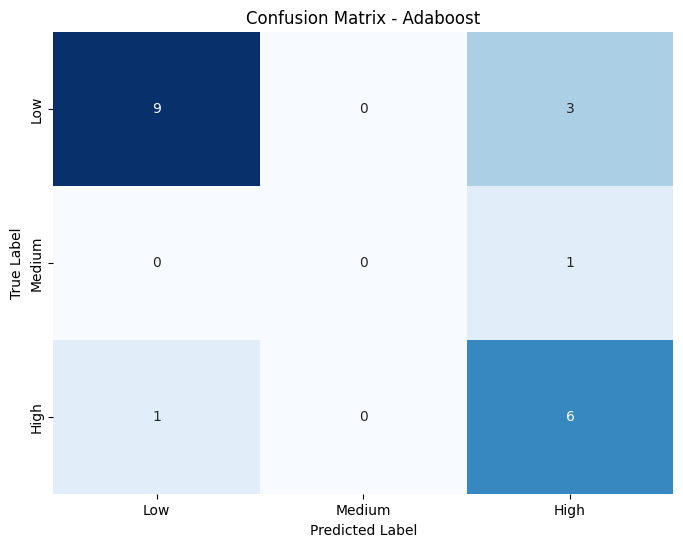

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have the confusion matrix already computed
conf_matrix_adaboost = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'Medium','High'],
            yticklabels=['Low', 'Medium','High'])
plt.title('Confusion Matrix - Adaboost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


